# Assignment: SVD Preprocessing on MNIST with Logistic Regression

## Instructions:
In this assignment, you will apply **Singular Value Decomposition (SVD)** as a preprocessing step to the **MNIST dataset** and train a **logistic regression classifier**. You will compare the model performance and training time when using different levels of SVD for dimensionality reduction.

In this assignment, you will need to:
1. Load the MNIST dataset and normalize it.
2. Perform SVD and reduce the dimensions of the data.
3. Train a logistic regression model on the original and SVD-reduced data.
4. Measure and compare the training time and accuracy of the model with varying SVD components.
5. Plot the results and analyze how SVD impacts the performance and efficiency of the model.

***
Your tasks include:
1. Implement SVD algorithm. You are not allowed to directly use SVD implemented by other packages, but you may use functions in NumPy. (Part 2)
2. Explore the accuracy and time performance from different numbers of SVD components. (Part 4)
3. Visualize the accuracy, time performance and top 5 singular vectors in the dataset, analyze and explain which number of SVD component looks best to you? (Part 4,5&6) Hint: singular vectors should be reshaped to 28x28 images for visualization.
***
**Note that you may not import any other function or package.** Let's get started!


## Part 1: Load the MNIST dataset and preprocess the data

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_openml
from sklearn.metrics import accuracy_score, classification_report

# Load MNIST dataset
print("Loading MNIST dataset...")
mnist = fetch_openml('mnist_784', version=1)
X = mnist.data
y = mnist.target

# Normalize the data
X = X / 255.0

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Loading MNIST dataset...


## Part 2: Implement SVD for Dimensionality Reduction

In [11]:
def apply_svd_custom(X_train, X_test, n_components):
      # Step 1: Calculate the covariance matrix
    covariance_matrix = np.dot(X_train.T, X_train)
    
    # Step 2: Compute the eigenvalues and eigenvectors
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)
    
    # Step 3: Sort the eigenvectors based on the eigenvalues in descending order
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvectors_sorted = eigenvectors[:, sorted_indices]
    
    # Step 4: Select the top `n_components` eigenvectors
    components = eigenvectors_sorted[:, :n_components]
    
    # Step 5: Project the training and testing data onto the new reduced space
    X_train_svd = np.dot(X_train, components)
    X_test_svd = np.dot(X_test, components)
    
    return X_train_svd, X_test_svd, eigenvectors_sorted

## Part 3: Train Logistic Regression and Measure Performance

In [4]:
# Function to train logistic regression and track training time
def train_logistic_regression(X_train, y_train, X_test, y_test):
    model = LogisticRegression(max_iter=1000, solver='saga', random_state=42, multi_class='multinomial')
    
    # Measure training time
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    
    return accuracy, training_time


## Part 4: Experiment with Different Levels of SVD

Now, apply SVD with varying numbers of components and observe how the dimensionality reduction impacts the model's performance. Record both the accuracy and training time for each number of components.


In [8]:
svd_components = [25, 50, 75, 100, 125, 150]  # You need to decide what number to search...

# Store the results
results = []

print("Training models with different levels of SVD preprocessing...")
for n_components in svd_components:
    print(f"Applying custom SVD with {n_components} components...")
    
    # Apply SVD to the training and test sets
    # Call apply_svd_custom() here...
    X_train_svd, X_test_svd = apply_svd_custom(X_train, X_test, n_components)

    
    # Train the logistic regression model and get accuracy and training time
    accuracy, training_time = train_logistic_regression(X_train_svd, y_train, X_test_svd, y_test)
    
    results.append((
        n_components,
        accuracy,
        training_time
    ))
        
    print(f"SVD components: {n_components}, Accuracy: {accuracy:.4f}, Training time: {training_time:.4f} seconds")


Training models with different levels of SVD preprocessing...
Applying custom SVD with 25 components...
SVD components: 25, Accuracy: 0.8854, Training time: 6.8432 seconds
Applying custom SVD with 50 components...
SVD components: 50, Accuracy: 0.9085, Training time: 28.8010 seconds
Applying custom SVD with 75 components...
SVD components: 75, Accuracy: 0.9151, Training time: 61.1045 seconds
Applying custom SVD with 100 components...
SVD components: 100, Accuracy: 0.9181, Training time: 108.3603 seconds
Applying custom SVD with 125 components...
SVD components: 125, Accuracy: 0.9192, Training time: 146.3885 seconds
Applying custom SVD with 150 components...
SVD components: 150, Accuracy: 0.9198, Training time: 177.2029 seconds


## Part 5: Visualize and Analyze the Results

Finally, plot the accuracy, training time as a function of the number of SVD components, and top 5 singular vectors. This will help you understand the trade-off between dimensionality reduction, accuracy, and model training time, and how SVD generally works. Hint: singular vectors should be reshaped to 28x28 images for visualization.


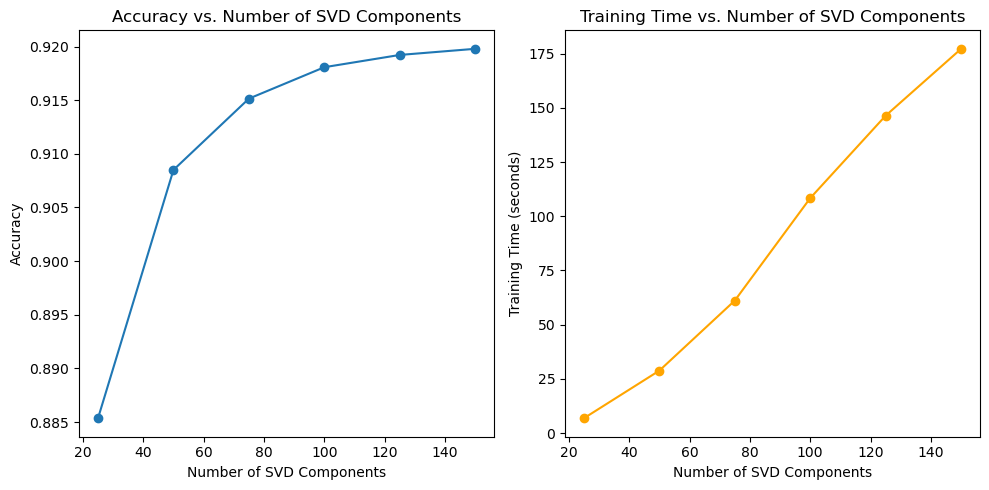

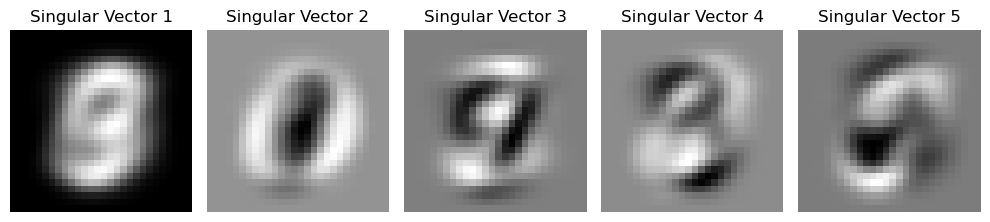

In [13]:
## Your implementation here...
## You may add necessary lines in Part 4 to access data for visualization

# Unpacking results
n_components_list = [r[0] for r in results]
accuracies = [r[1] for r in results]
training_times = [r[2] for r in results]

# Plot Accuracy vs. Number of SVD Components
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.plot(n_components_list, accuracies, marker='o')
plt.title('Accuracy vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Accuracy')

# Plot Training Time vs. Number of SVD Components
plt.subplot(1, 2, 2)
plt.plot(n_components_list, training_times, marker='o', color='orange')
plt.title('Training Time vs. Number of SVD Components')
plt.xlabel('Number of SVD Components')
plt.ylabel('Training Time (seconds)')

plt.tight_layout()
plt.show()

# For top 5 singular vectors, assuming you have access to the U matrix from SVD:
# Let U_svd be the matrix of singular vectors after applying SVD on training data (X_train)
# The first 5 columns correspond to the top 5 singular vectors

x_train_svd, x_test_svd, eigenvectors = apply_svd_custom(X_train, X_test, n_components ) 
top_5_singular_vectors = eigenvectors[:, :5]  # Take the first 5 singular vectors

# Reshape and plot the singular vectors as images (28x28 pixels)
plt.figure(figsize=(10, 5))
for i in range(5):
    singular_vector = top_5_singular_vectors[:, i].reshape(28, 28)  # Reshape to 28x28
    
    plt.subplot(1, 5, i+1)
    plt.imshow(singular_vector, cmap='gray')
    plt.title(f'Singular Vector {i+1}')
    plt.axis('off')

plt.tight_layout()
plt.show()



## Part 6: Analyze / Conclusion 

YOUR ANSWER: 

The accuracy increases as the number of svd components increases however the rate of imporvement or marignal imporvement falls off as the number of components is increased, causing the graph of num componets vs accuracy to appear to folow an almost logrithmic curve. Training time other hand increases in a linear manner as the number of svd components increases. The singular vectors show where there is the most variation in the dataset.

The first singular vector appears to form a 9 

The second appears to form a 1 or maybe a 0 

The third appears to form a 9

The fourth appears to form a 4

The fifth harder to work out but appers to form a 6